In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the combined runtime CSV (all languages)
# Generated by: python tools/combine_results.py
csv_path = '../../output/results/stats/combined_analysis_stats-time.csv'

df = pd.read_csv(csv_path, header=None, names=[
    'path', 'status', 'db_creation_time', 'query_time1', 'query_time2', 'analysis_time'
], on_bad_lines='skip')

# Strip whitespace from status column (handles Windows line endings)
df['status'] = df['status'].str.strip()

# Filter for completed status only
df_completed = df[df['status'] == 'completed'].copy()
df_completed = df_completed.reset_index(drop=True)

print(f"Total rows: {len(df)}")
print(f"Completed rows: {len(df_completed)}")
df_completed.head()

In [3]:
# Calculate the three runtime metrics
# 1. DB Creation + Queries + Analysis (total)
df_completed['total_time'] = (
    df_completed['db_creation_time'] + 
    df_completed['query_time1'] + 
    df_completed['query_time2'] + 
    df_completed['analysis_time']
)

# 2. Queries + Analysis
df_completed['queries_analysis_time'] = (
    df_completed['query_time1'] + 
    df_completed['query_time2'] + 
    df_completed['analysis_time']
)

# 3. Analysis Only
df_completed['analysis_only'] = df_completed['analysis_time']

# Display statistics
print("Runtime Statistics (seconds):")
print(f"\nDB Creation + Queries + Analysis:")
print(f"  Mean: {df_completed['total_time'].mean():.2f}s")
print(f"  Median: {df_completed['total_time'].median():.2f}s")
print(f"  Std: {df_completed['total_time'].std():.2f}s")

print(f"\nQueries + Analysis:")
print(f"  Mean: {df_completed['queries_analysis_time'].mean():.2f}s")
print(f"  Median: {df_completed['queries_analysis_time'].median():.2f}s")
print(f"  Std: {df_completed['queries_analysis_time'].std():.2f}s")

print(f"\nAnalysis Only:")
print(f"  Mean: {df_completed['analysis_only'].mean():.2f}s")
print(f"  Median: {df_completed['analysis_only'].median():.2f}s")
print(f"  Std: {df_completed['analysis_only'].std():.2f}s")

Runtime Statistics (seconds):

DB Creation + Queries + Analysis:
  Mean: 79.45s
  Median: 62.31s
  Std: 64.90s

Queries + Analysis:
  Mean: 55.96s
  Median: 43.70s
  Std: 46.39s

Analysis Only:
  Mean: 0.08s
  Median: 0.06s
  Std: 0.10s


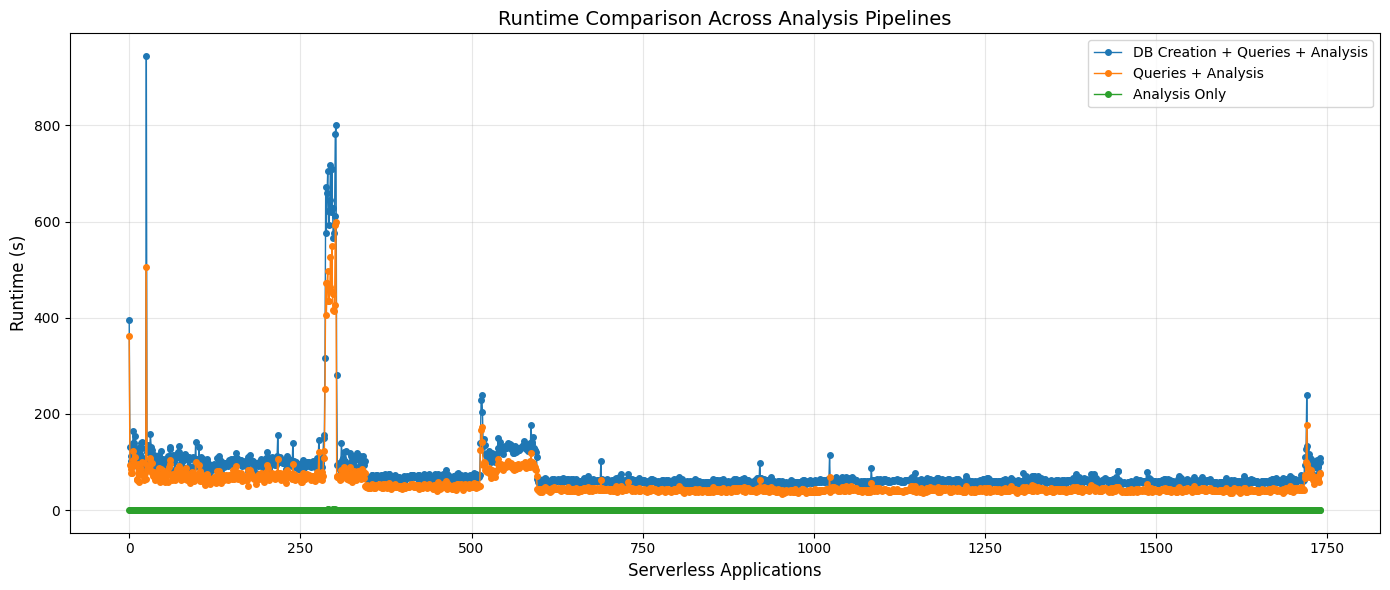


Graph saved to runtime.png


In [4]:
# Create the runtime comparison graph
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(df_completed))

# Plot the three series
ax.plot(x, df_completed['total_time'], 'o-', color='#1f77b4', 
        markersize=4, linewidth=1, label='DB Creation + Queries + Analysis')
ax.plot(x, df_completed['queries_analysis_time'], 'o-', color='#ff7f0e', 
        markersize=4, linewidth=1, label='Queries + Analysis')
ax.plot(x, df_completed['analysis_only'], 'o-', color='#2ca02c', 
        markersize=4, linewidth=1, label='Analysis Only')

# Labels and title
ax.set_xlabel('Serverless Applications', fontsize=12)
ax.set_ylabel('Runtime (s)', fontsize=12)
ax.set_title('Runtime Comparison Across Analysis Pipelines', fontsize=14)

# Legend
ax.legend(loc='upper right', fontsize=10)

# Grid
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('runtime.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nGraph saved to runtime.png")

### Insights: Runtime Comparison (Full Dataset)

**Key Observations:**

1. **DB Creation and CodeQL Queries Dominate Runtime**: The gap between the blue line (total pipeline) and the orange line (queries + analysis) represents the CodeQL database creation time, accounting for approximately **30% of total runtime** (~23.5s average). The queries themselves contribute another **70%** of the remaining time.

2. **Analysis Time is Negligible**: The green line (Analysis Only) is nearly flat at the bottom, showing that our policy generation analysis completes in **< 0.1 seconds** on average. This demonstrates that the core analysis logic is highly efficient.

3. **Runtime Variability is Tool-Dependent**: The spikes and variations in the blue and orange lines are primarily caused by:
   - **Project size**: Larger codebases require more time for DB creation and query execution
   - **CodeQL performance**: Query execution time varies based on code complexity
   - **System resources**: I/O and CPU availability during CodeQL operations


In [5]:
# randomly sample 601 rows for analysis
df_sampled = df_completed.sample(n=601, random_state=25).reset_index(drop=True)

In [6]:
# Calculate the three runtime metrics
# 1. DB Creation + Queries + Analysis (total)
df_sampled['total_time'] = (
    df_sampled['db_creation_time'] + 
    df_sampled['query_time1'] + 
    df_sampled['query_time2'] + 
    df_sampled['analysis_time']
)

# 2. Queries + Analysis
df_sampled['queries_analysis_time'] = (
    df_sampled['query_time1'] + 
    df_sampled['query_time2'] + 
    df_sampled['analysis_time']
)

# 3. Analysis Only
df_sampled['analysis_only'] = df_sampled['analysis_time']

# Display statistics
print("Runtime Statistics (seconds):")
print(f"\nDB Creation + Queries + Analysis:")
print(f"  Mean: {df_sampled['total_time'].mean():.2f}s")
print(f"  Median: {df_sampled['total_time'].median():.2f}s")
print(f"  Std: {df_sampled['total_time'].std():.2f}s")

print(f"\nQueries + Analysis:")
print(f"  Mean: {df_sampled['queries_analysis_time'].mean():.2f}s")
print(f"  Median: {df_sampled['queries_analysis_time'].median():.2f}s")
print(f"  Std: {df_sampled['queries_analysis_time'].std():.2f}s")

print(f"\nAnalysis Only:")
print(f"  Mean: {df_sampled['analysis_only'].mean():.2f}s")
print(f"  Median: {df_sampled['analysis_only'].median():.2f}s")
print(f"  Std: {df_sampled['analysis_only'].std():.2f}s")

Runtime Statistics (seconds):

DB Creation + Queries + Analysis:
  Mean: 77.34s
  Median: 62.26s
  Std: 58.66s

Queries + Analysis:
  Mean: 54.51s
  Median: 43.54s
  Std: 42.68s

Analysis Only:
  Mean: 0.08s
  Median: 0.06s
  Std: 0.11s


In [21]:
# what is the min and max in the sampled data
print("\nSampled Data Runtimes (seconds):")
print(f"\nDB Creation + Queries + Analysis:")
print(f"  Min: {df_sampled['total_time'].min():.2f}s")
print(f"  Max: {df_sampled['total_time'].max():.2f}s")


Sampled Data Runtimes (seconds):

DB Creation + Queries + Analysis:
  Min: 51.09s
  Max: 801.67s


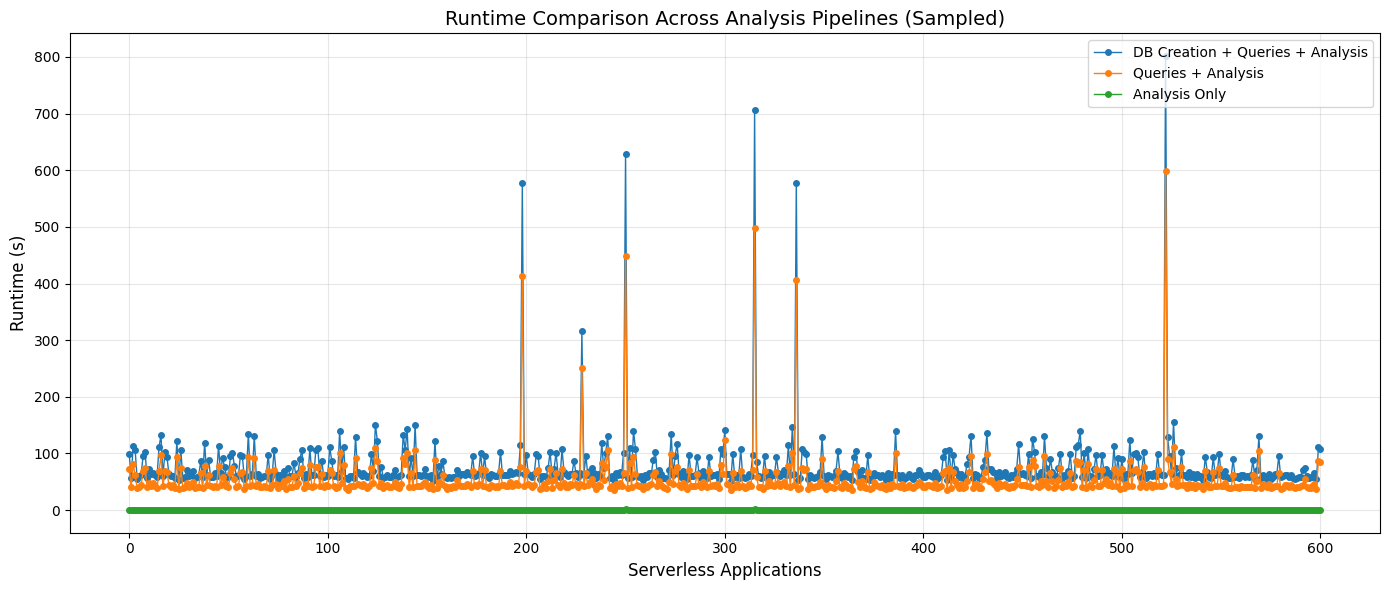

In [7]:
# Create the runtime comparison graph
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(df_sampled))

# Plot the three series
ax.plot(x, df_sampled['total_time'], 'o-', color='#1f77b4', 
        markersize=4, linewidth=1, label='DB Creation + Queries + Analysis')
ax.plot(x, df_sampled['queries_analysis_time'], 'o-', color='#ff7f0e', 
        markersize=4, linewidth=1, label='Queries + Analysis')
ax.plot(x, df_sampled['analysis_only'], 'o-', color='#2ca02c', 
        markersize=4, linewidth=1, label='Analysis Only')

# Labels and title
ax.set_xlabel('Serverless Applications', fontsize=12)
ax.set_ylabel('Runtime (s)', fontsize=12)
ax.set_title('Runtime Comparison Across Analysis Pipelines (Sampled)', fontsize=14)

# Legend
ax.legend(loc='upper right', fontsize=10)

# Grid
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('runtime_sampled.png', dpi=150, bbox_inches='tight')
plt.show()

### Insights: Runtime Comparison (Sampled Dataset - 601 Applications)

**Observations from Sampled Data:**

The sampled dataset (n=601) exhibits similar patterns to the full dataset, confirming that the performance characteristics are consistent:

- **Mean total runtime**: ~77s (vs 79s full dataset)
- **Mean queries + analysis**: ~55s (vs 56s full dataset)  
- **Mean analysis only**: ~0.08s (identical)

**Consistency Across Samples**: The similar statistics between full and sampled datasets indicate that the runtime distribution is stable and representative. This validates that:
1. The performance bottleneck (CodeQL operations) is systematic, not caused by outliers
2. Sample-based analysis can reliably characterize the tool's performance

/tmp/ipykernel_3934939/3956534712.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=labels, patch_artist=True)


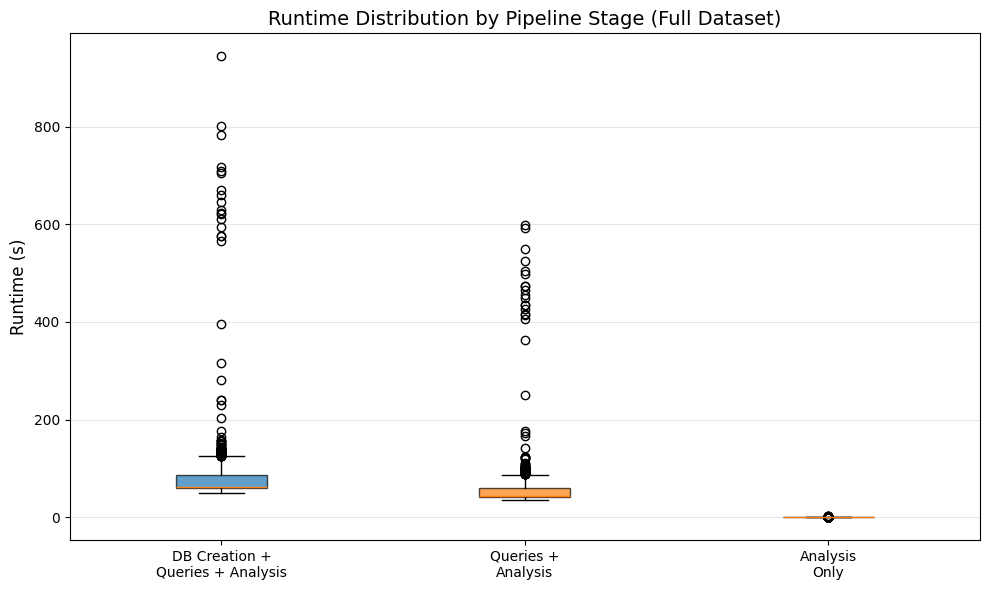

In [8]:
# Box Plot - Full Dataset
fig, ax = plt.subplots(figsize=(10, 6))

box_data = [df_completed['total_time'], df_completed['queries_analysis_time'], df_completed['analysis_only']]
labels = ['DB Creation +\nQueries + Analysis', 'Queries +\nAnalysis', 'Analysis\nOnly']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

bp = ax.boxplot(box_data, labels=labels, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('Runtime (s)', fontsize=12)
ax.set_title('Runtime Distribution by Pipeline Stage (Full Dataset)', fontsize=14)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('runtime_boxplot.png', dpi=150, bbox_inches='tight')
plt.show()

/tmp/ipykernel_3934939/437872207.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=labels, patch_artist=True)


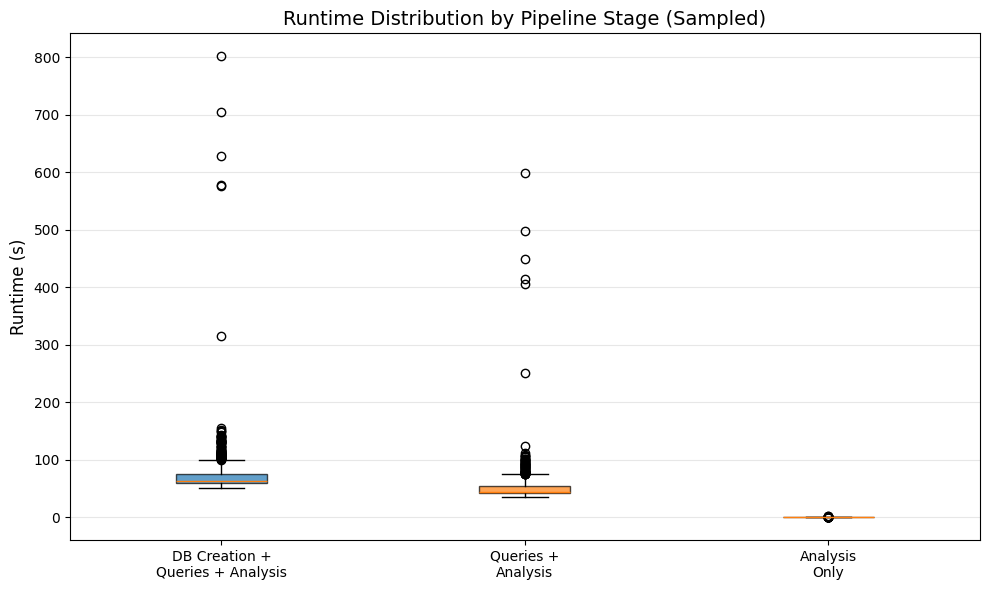

In [9]:
# Box Plot - Sampled Dataset
fig, ax = plt.subplots(figsize=(10, 6))

box_data = [df_sampled['total_time'], df_sampled['queries_analysis_time'], df_sampled['analysis_only']]
labels = ['DB Creation +\nQueries + Analysis', 'Queries +\nAnalysis', 'Analysis\nOnly']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

bp = ax.boxplot(box_data, labels=labels, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('Runtime (s)', fontsize=12)
ax.set_title('Runtime Distribution by Pipeline Stage (Sampled)', fontsize=14)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('runtime_boxplot_sampled.png', dpi=150, bbox_inches='tight')
plt.show()

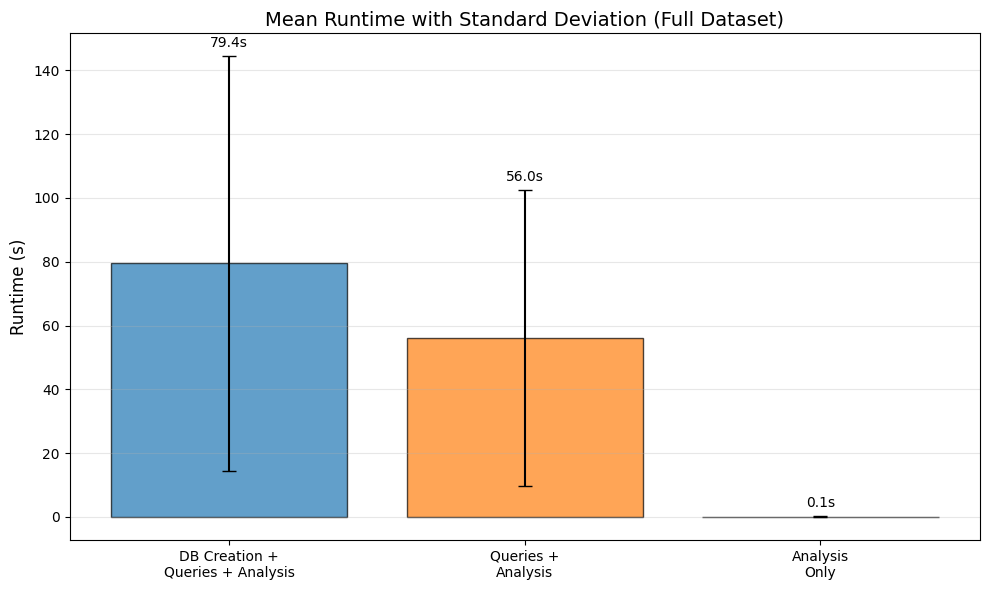

In [10]:
# Bar Chart with Error Bars - Full Dataset
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['DB Creation +\nQueries + Analysis', 'Queries +\nAnalysis', 'Analysis\nOnly']
means = [df_completed['total_time'].mean(), df_completed['queries_analysis_time'].mean(), df_completed['analysis_only'].mean()]
stds = [df_completed['total_time'].std(), df_completed['queries_analysis_time'].std(), df_completed['analysis_only'].std()]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

x = np.arange(len(categories))
bars = ax.bar(x, means, yerr=stds, capsize=5, color=colors, alpha=0.7, edgecolor='black')

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Runtime (s)', fontsize=12)
ax.set_title('Mean Runtime with Standard Deviation (Full Dataset)', fontsize=14)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, mean, std in zip(bars, means, stds):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 2, 
            f'{mean:.1f}s', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('runtime_bar.png', dpi=150, bbox_inches='tight')
plt.show()

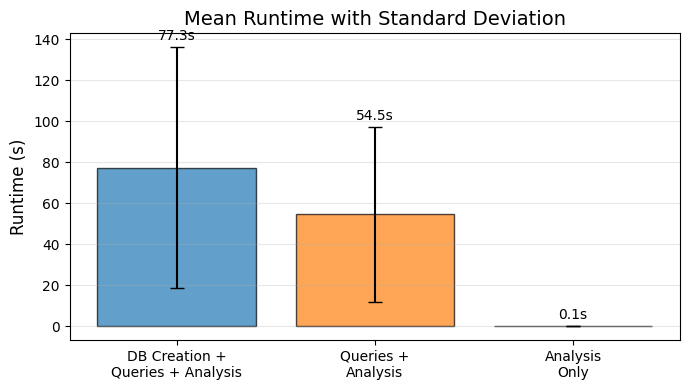

In [20]:
# Bar Chart with Error Bars - Sampled Dataset
fig, ax = plt.subplots(figsize=(7, 4))

categories = ['DB Creation +\nQueries + Analysis', 'Queries +\nAnalysis', 'Analysis\nOnly']
means = [df_sampled['total_time'].mean(), df_sampled['queries_analysis_time'].mean(), df_sampled['analysis_only'].mean()]
stds = [df_sampled['total_time'].std(), df_sampled['queries_analysis_time'].std(), df_sampled['analysis_only'].std()]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

x = np.arange(len(categories))
bars = ax.bar(x, means, yerr=stds, capsize=5, color=colors, alpha=0.7, edgecolor='black')

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Runtime (s)', fontsize=12)
ax.set_title('Mean Runtime with Standard Deviation', fontsize=14)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, mean, std in zip(bars, means, stds):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 2, 
            f'{mean:.1f}s', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('runtime_bar_sampled.png', dpi=150, bbox_inches='tight')
plt.show()

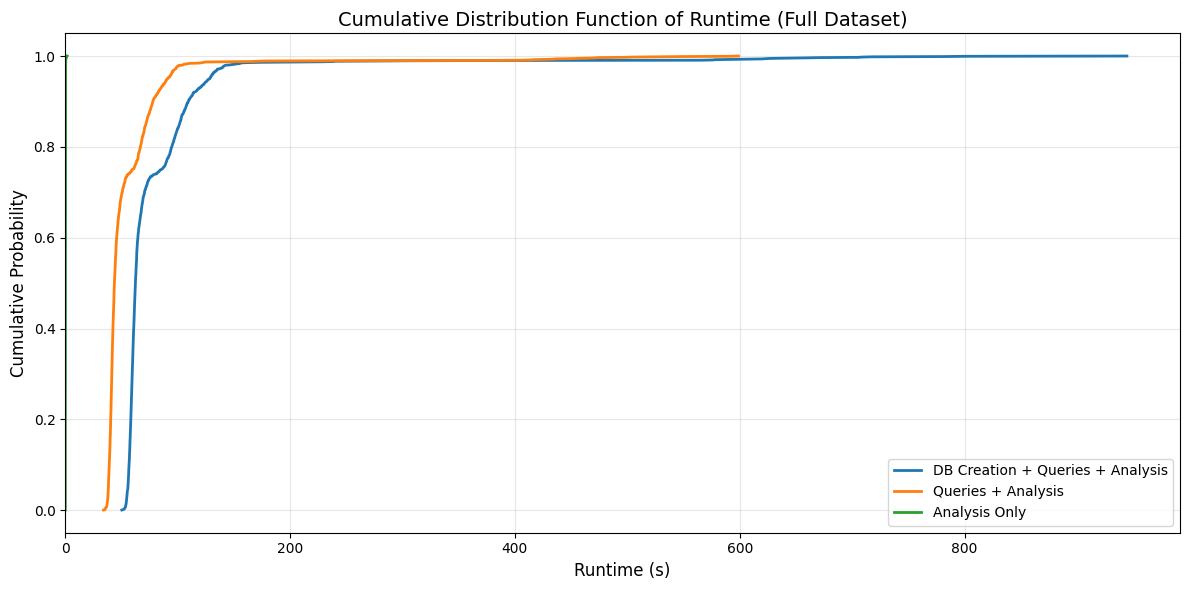

In [12]:
# CDF Plot - Full Dataset
fig, ax = plt.subplots(figsize=(12, 6))

for col, label, color in [('total_time', 'DB Creation + Queries + Analysis', '#1f77b4'),
                           ('queries_analysis_time', 'Queries + Analysis', '#ff7f0e'),
                           ('analysis_only', 'Analysis Only', '#2ca02c')]:
    sorted_data = np.sort(df_completed[col])
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax.plot(sorted_data, cdf, label=label, color=color, linewidth=2)

ax.set_xlabel('Runtime (s)', fontsize=12)
ax.set_ylabel('Cumulative Probability', fontsize=12)
ax.set_title('Cumulative Distribution Function of Runtime (Full Dataset)', fontsize=14)
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(left=0)

plt.tight_layout()
plt.savefig('runtime_cdf.png', dpi=150, bbox_inches='tight')
plt.show()

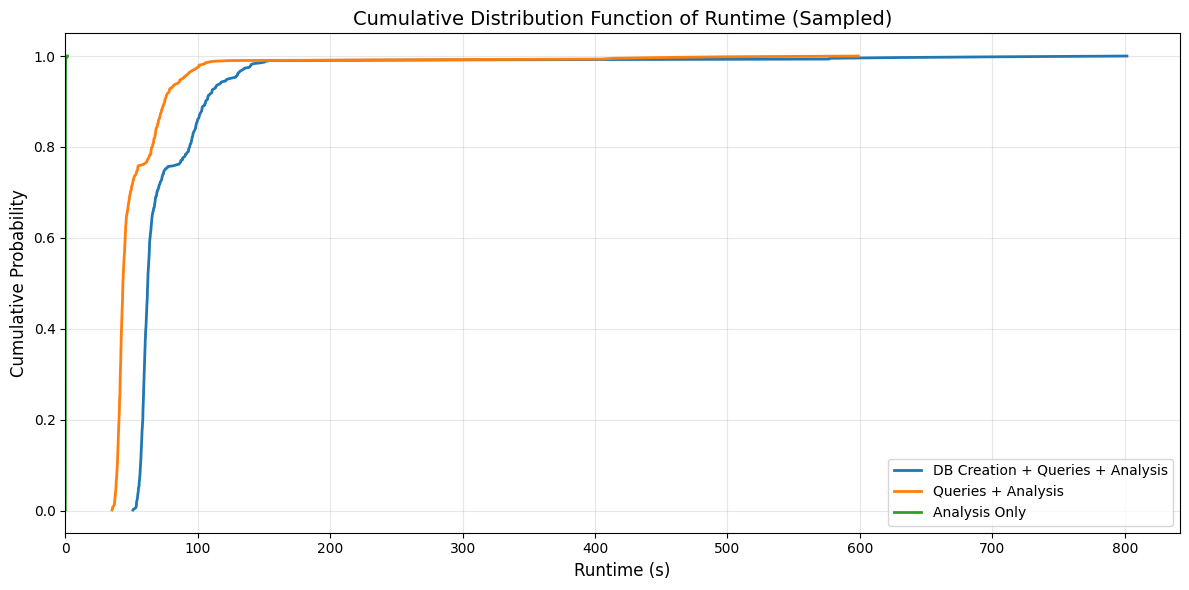

In [13]:
# CDF Plot - Sampled Dataset
fig, ax = plt.subplots(figsize=(12, 6))

for col, label, color in [('total_time', 'DB Creation + Queries + Analysis', '#1f77b4'),
                           ('queries_analysis_time', 'Queries + Analysis', '#ff7f0e'),
                           ('analysis_only', 'Analysis Only', '#2ca02c')]:
    sorted_data = np.sort(df_sampled[col])
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax.plot(sorted_data, cdf, label=label, color=color, linewidth=2)

ax.set_xlabel('Runtime (s)', fontsize=12)
ax.set_ylabel('Cumulative Probability', fontsize=12)
ax.set_title('Cumulative Distribution Function of Runtime (Sampled)', fontsize=14)
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(left=0)

plt.tight_layout()
plt.savefig('runtime_cdf_sampled.png', dpi=150, bbox_inches='tight')
plt.show()

---

## Summary: Performance Evaluation Conclusions

### Runtime Distribution by Component

| Component | Mean | Median | % of Total Runtime |
|-----------|------|--------|-------------------|
| CodeQL DB Creation | 23.5s | 18.6s | ~30% |
| CodeQL Query Execution | 55.9s | 43.6s | ~70% |
| **Policy Analysis** | **0.08s** | **0.06s** | **< 0.1%** |

### Key Takeaways

1. **The analysis algorithm is highly efficient**: Our policy generation completes in milliseconds, contributing virtually nothing to overall runtime. The algorithm's time complexity is not a limiting factor.

2. **CodeQL operations dominate runtime**: Database creation and query execution account for >99.9% of total processing time. This is expected behavior for CodeQL-based analysis.

3. **Runtime variability is external**: The high standard deviation in total runtime (±65s) is entirely attributable to CodeQL and project characteristics, not our analysis logic.